<center><h1>Vertebral Column Data</h1></center>
<br>

| Key | Value |
| :- | :- |
| Name: | Hanan Ali |
| USC ID: | 1782313333 |
| GitHub Username: | hananali2023 |

### (a) Download Data

Package imports

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Get the Vertebral Column Data Set

In [52]:
column_names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle","sacral_slope","pelvic_radius","grade_spondylolisthesis", "class_label"]

data = "/Users/hanan/DSCI 552/HW1/data/vertebral+column/column_2c.dat"

df = pd.read_csv(data, header=None, delimiter=" ", names=column_names)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

/Users/hanan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.1, 'Scatter Plot for all Independent Variables')

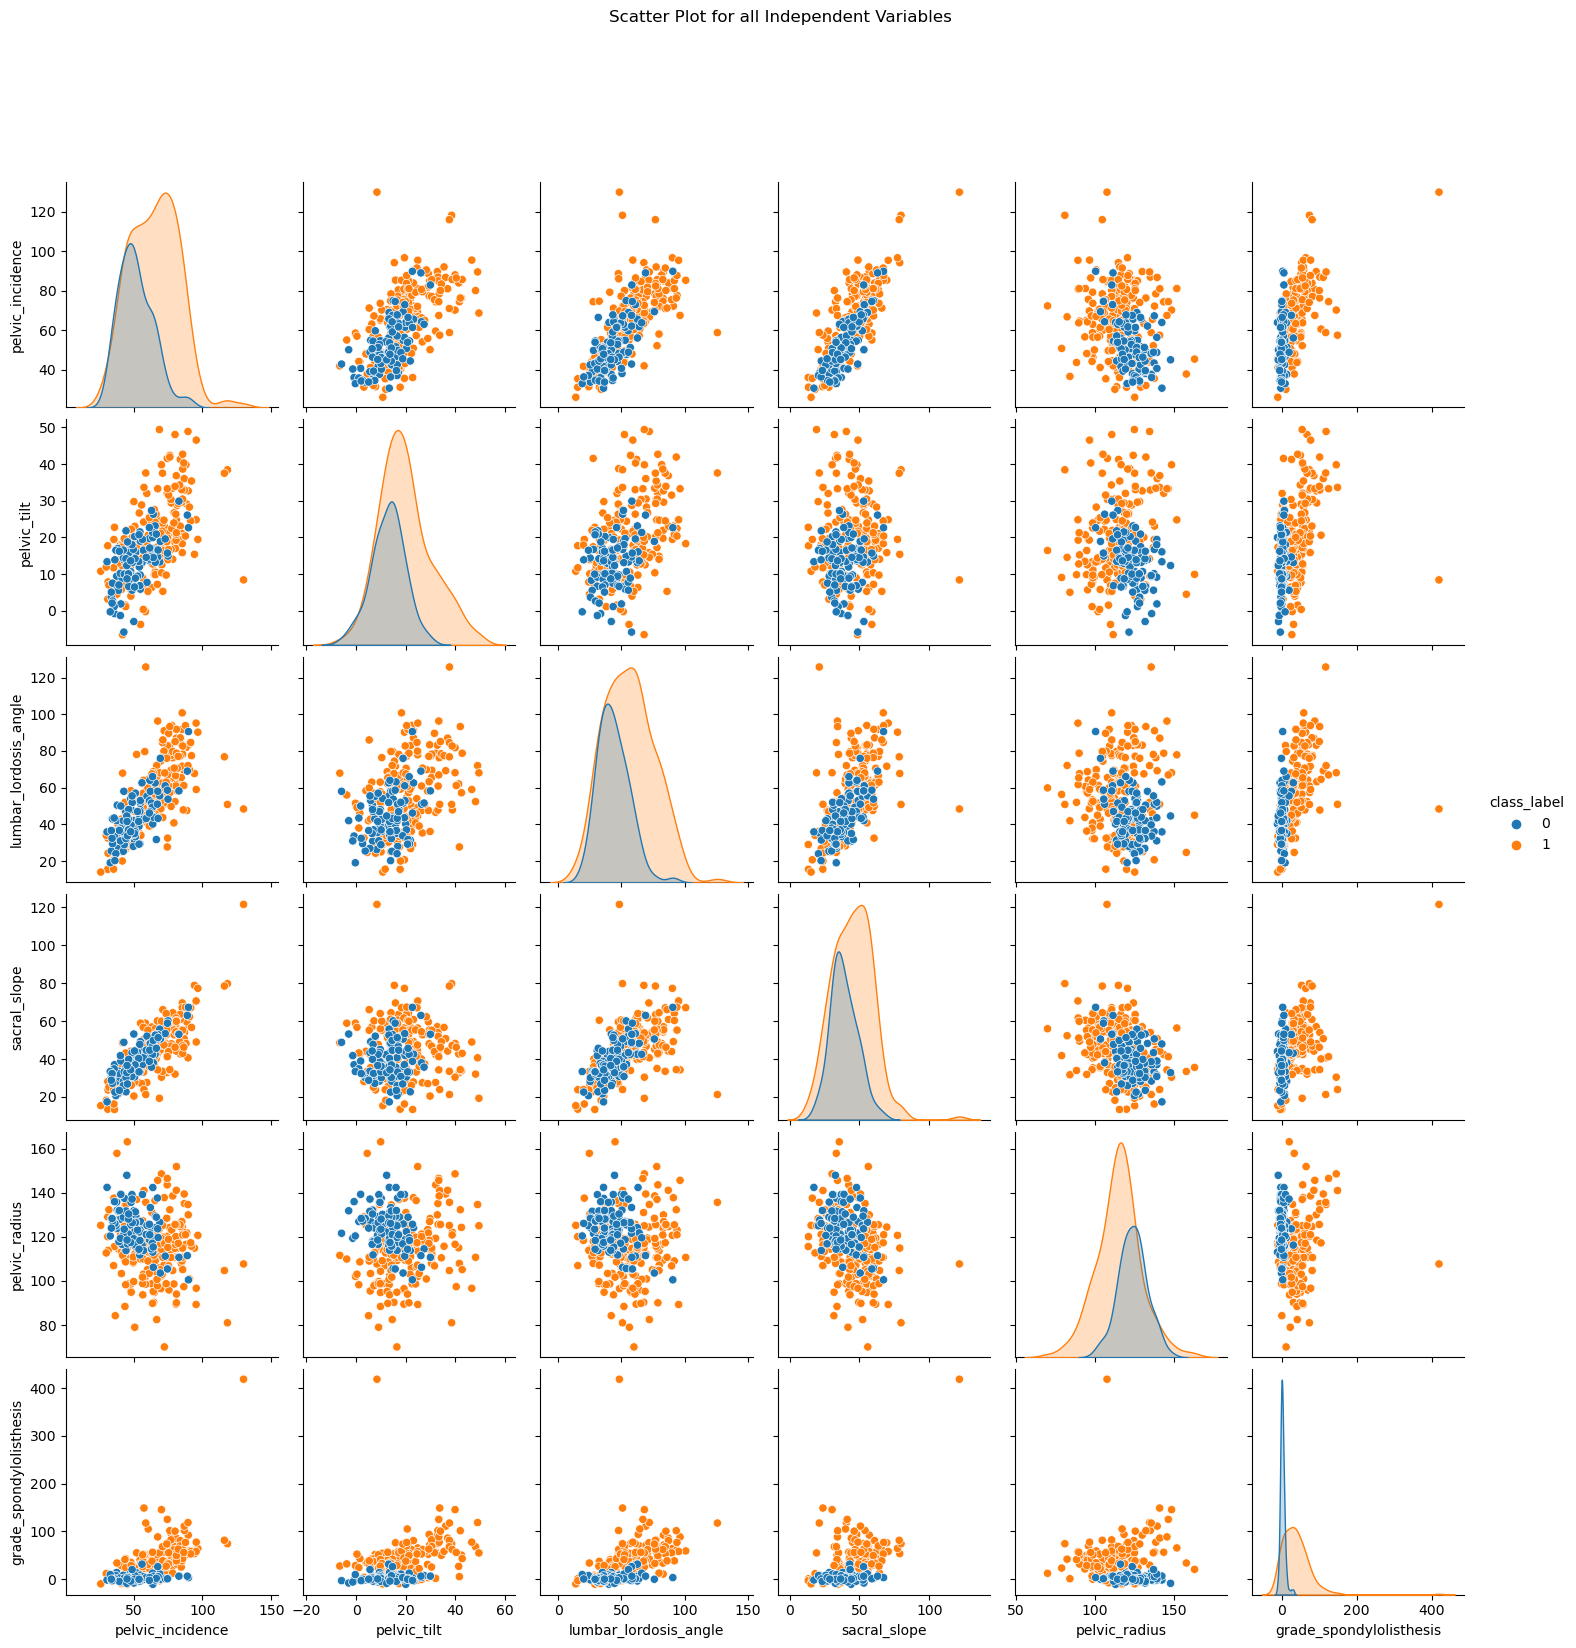

In [53]:
df.replace(['AB', 'NO'], [1, 0], inplace=True)
scatter = sns.pairplot(df, hue = "class_label")
scatter.fig.suptitle("Scatter Plot for all Independent Variables", y = 1.1)


#### ii. Boxplots

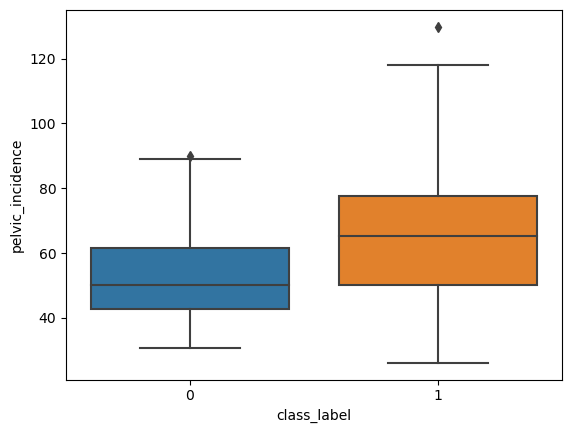

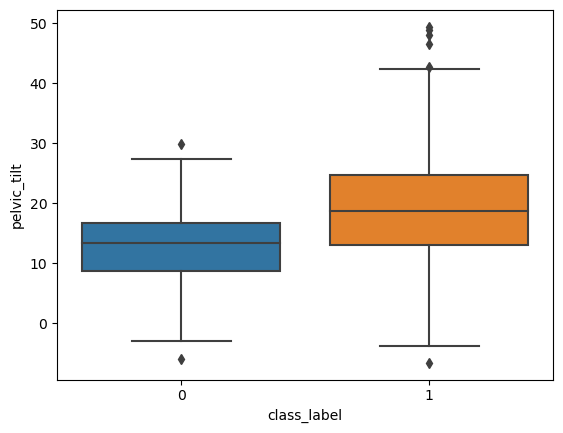

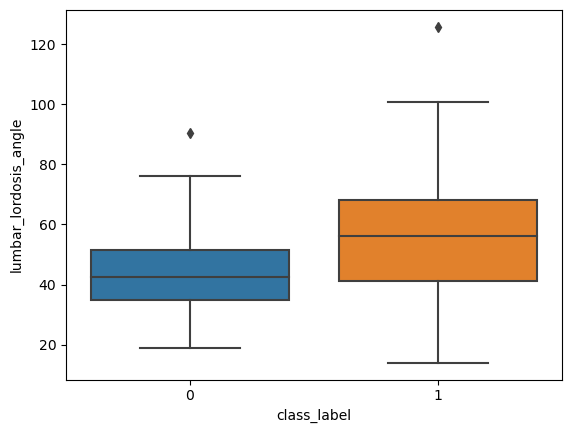

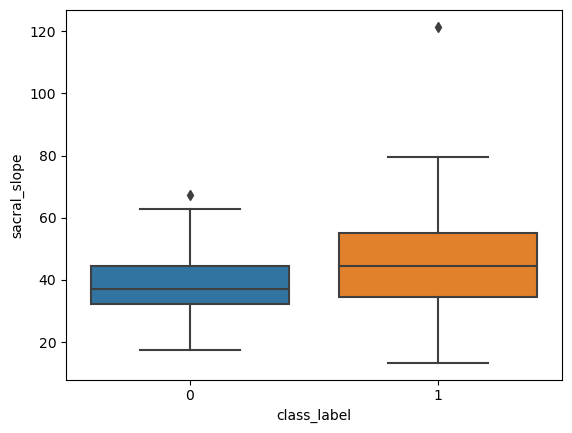

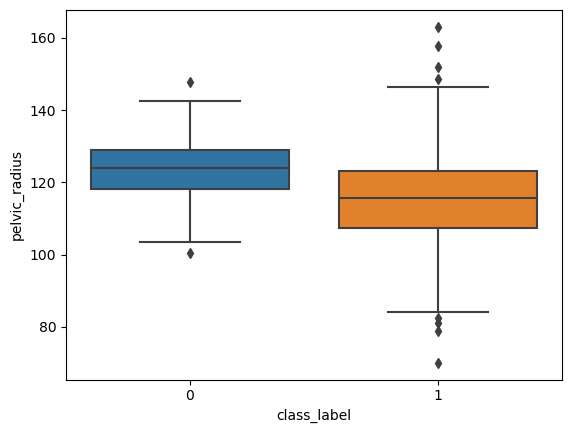

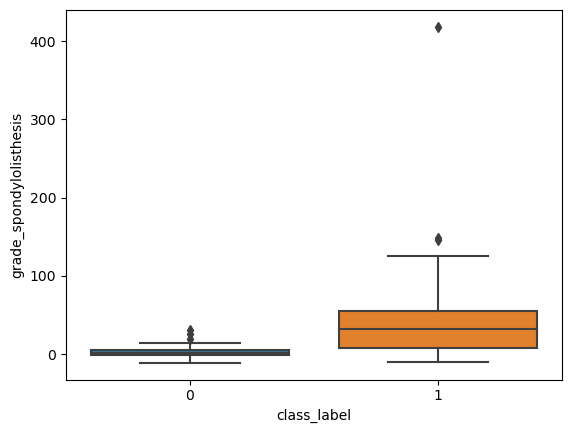

In [54]:
for i in range(0, len(df.columns)-1):
    sns.boxplot(df, x="class_label", y=df.columns[i])
    plt.show()

#### iii. Split Data Set

In [56]:
train_set = pd.concat([df[df["class_label"] == 0].iloc[0:70, :], df[df["class_label"] == 1].iloc[0:140, :]])
test_set = pd.concat([df[df["class_label"] == 0].iloc[70:, :], df[df["class_label"] == 1].iloc[140:, :]])

print(f"Training set: {train_set.shape}")
print(f"Testing set: {test_set.shape}")

Training set: (210, 7)
Testing set: (100, 7)


### (c) Classification

#### i. Euclidean Metric

In [58]:
train_features = train_set.iloc[:, :-1].values
train_labels = train_set.iloc[:, -1].values

test_features = test_set.iloc[:, :-1].values   
test_labels = test_set.iloc[:, -1].values


knn = KNeighborsClassifier(n_neighbors=5, p=2,  metric='euclidean')
knn.fit(train_features, train_labels)

KNeighborsClassifier(metric='euclidean')

#### ii. Test Data

In [59]:
k_values = list(range(208, 0, -3))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    knn.fit(train_features, train_labels)
    
    train_pred = knn.predict(train_features)
    test_pred = knn.predict(test_features)
    
    train_accuracy = accuracy_score(train_labels, train_pred)
    test_accuracy = accuracy_score(test_labels, test_pred)
    
    train_error = 1 - knn.score(train_features, train_labels)
    train_errors.append(train_error)
    
    test_error = 1 - knn.score(test_features, test_labels)
    test_errors.append(test_error)


best_k_idx = np.argmin(test_errors)
best_k = k_values[best_k_idx]
best_test_error = test_errors[best_k_idx]

print(f"Best k-value is k={best_k} with a testing error of {round(best_test_error,2)}.")

Best k-value is k=4 with a testing error of 0.06.


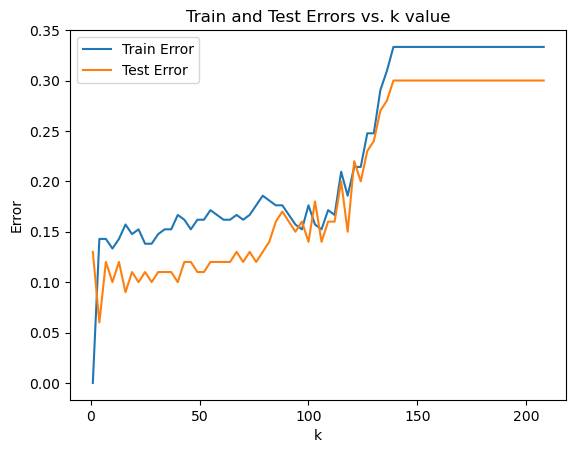

In [60]:
# Plot of train and test errors in terms of k
plt.plot(k_values, train_errors, label='Train Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. k value')
plt.legend()
plt.show()

69 25 5 1


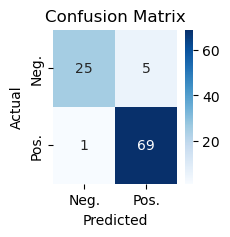

,Metric,Value
0,True Positive Rate,0.99
1,True Negative Rate,0.83
2,Precision,0.93
3,F1 Score,0.96


In [61]:
# Confusion matrix, true positive rate, true negative rate, precision, and F1-score when k=k*
knn_classifier = KNeighborsClassifier(n_neighbors = best_k, metric='euclidean')
knn_classifier.fit(train_features, train_labels)
pred_test = knn_classifier.predict(test_features)
# X = features, Y = labels
conf_matrix = confusion_matrix(test_labels, pred_test)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
print(TP,TN,FP,FN)

true_positive_rate = TP / (TP + FN)
true_negative_rate = TN / (FP + TN)
precision = TP / (TP + FP)
f1_score = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)


class_labels = ["Neg.", "Pos."]
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

data = {
    "Metric": ["True Positive Rate", "True Negative Rate", "Precision", "F1 Score"],
    "Value": [round(true_positive_rate, 2), round(true_negative_rate, 2), round(precision, 2), round(f1_score, 2)]
}
matrix = pd.DataFrame(data)
matrix


#### iii. Learning Curve

In [62]:
best_test_errors = []
best_k_list = []

for n in range(10, 211, 10):
    class_0 = train_set[train_set['class_label'] == 0].iloc[:n//3, :]
    class_1 = train_set[train_set['class_label'] == 1].iloc[:n - (n//3), :]
    subset_train_set = pd.concat([class_0, class_1])
    
    subset_training_features = subset_train_set.iloc[:, 0:(len(df.columns) - 1)].values
    subset_training_labels = subset_train_set.iloc[:, (len(df.columns) - 1)].values
    
    best_error = float('inf')
    best_k = []
    
    for k in range(1, n, 5):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(subset_training_features, subset_training_labels)
        
        test_pred =  knn.predict(test_features)
        
        test_error = 1 - accuracy_score(test_labels, test_pred)
        
        if test_error < best_error:
            best_error = round(test_error, 2)
            best_k = k
            
    best_k_list.append(best_k)
    best_test_errors.append(best_error)
    

print(f"Optimal k: {min(best_k_list)}")
print(f"Error rate for optimal k: {min(best_test_errors)}")

Optimal k: 1
Error rate for optimal k: 0.08


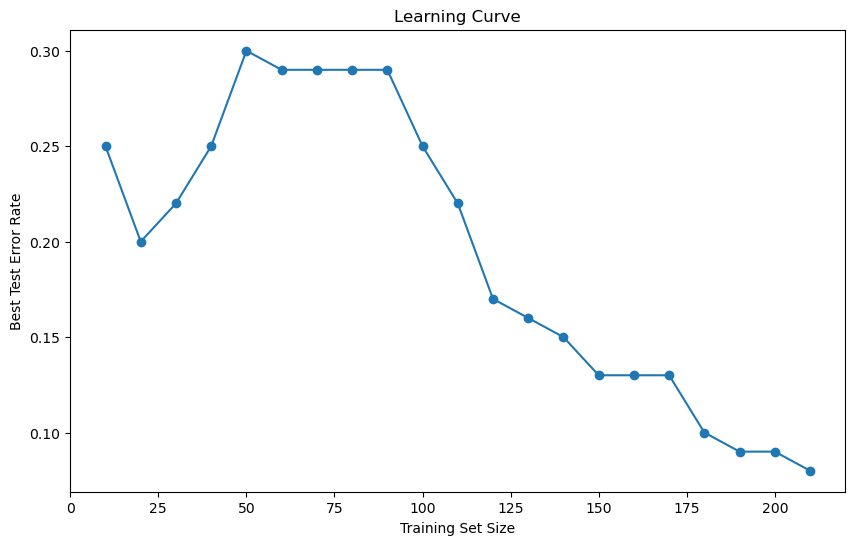

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(range(10, 211, 10), best_test_errors, marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [148]:
k_values = list(range(1, 197, 5))

test_errors = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn.fit(train_features, train_labels)
    
    test_pred = knn.predict(test_features)
    
    test_error = 1 - accuracy_score(test_labels, test_pred)
    
    test_errors[k] = test_error

best_k = min(test_errors, key=test_errors.get)
best_test_error = test_errors[best_k]

test_errors_df = pd.DataFrame.from_dict(test_errors, orient='index', columns=['Test Error'])
test_errors_df.index.name = 'k'
test_errors_df.reset_index(inplace=True)

print("Best k:", best_k)
print("Corresponding Test Error:", round(best_test_error, 2))

test_errors_df = pd.DataFrame.from_dict(test_errors, orient='index', columns=['Test Error'])
test_errors_df.index.name = 'k'
test_errors_df.reset_index(inplace=True)
test_errors_df


Best k: 6
Corresponding Test Error: 0.11


,k,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [122]:
best_k = 6

log_p_values = np.arange(0.1, 1.1, 0.1)
test_errors = {}

for log_p in log_p_values:
    p = 10 ** log_p
    
    knn = KNeighborsClassifier(n_neighbors=best_k, p=p, metric='minkowski')
    knn.fit(train_features, train_labels)
    
    test_pred = knn.predict(test_features)
    test_error = 1 - accuracy_score(test_labels, test_pred)
    
    test_errors[log_p] = test_error
    
best_log_p = min(test_errors, key=test_errors.get)
best_test_error = test_errors[best_log_p]

print("Best log10(p):", round(best_log_p, 2))
print("Corresponding Test Error:", round(best_test_error, 2))


print("\nLog10(p)   Test Error")
for log_p, error in test_errors.items():
    print(f"{log_p:<10.1f} {error:<10.3f}")


Best log10(p): 0.6
Corresponding Test Error: 0.06

Log10(p)   Test Error
0.1        0.090     
0.2        0.090     
0.3        0.080     
0.4        0.080     
0.5        0.080     
0.6        0.060     
0.7        0.070     
0.8        0.080     
0.9        0.090     
1.0        0.090     


##### C. Chebyshev Distance With p -> infinity.

In [149]:
k_values = list(range(1, 200, 5))  

test_errors = {}  

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k, p=float('inf'), metric='minkowski')
    
    knn.fit(train_features, train_labels)
    
    test_pred = knn.predict(test_features)
    
    test_error = 1 - accuracy_score(test_labels, test_pred)
    
    test_errors[k] = test_error

best_k = min(test_errors, key=test_errors.get)
best_test_error = test_errors[best_k]


print("Best k:", best_k)
print("Corresponding Test Error:", round(best_test_error, 2))

test_errors_df = pd.DataFrame.from_dict(test_errors, orient='index', columns=['Test Error'])
test_errors_df.index.name = 'k'
test_errors_df.reset_index(inplace=True)
test_errors_df


Best k: 16
Corresponding Test Error: 0.08


,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


#### ii. Mahalanobis Distance.

In [167]:
k_values = list(range(1, 200, 5))

cov_matrix = np.cov(train_features, rowvar=False)

best_test_error = float('inf')
best_k = None
test_errors = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(cov_matrix)})
    
    knn.fit(train_features, train_labels)
    
    test_pred = knn.predict(test_features)
    test_error = 1 - accuracy_score(test_labels, test_pred)
    
    test_errors[k] = test_error
    
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k

print("Best Test Error:", best_test_error)
print("Best k:", best_k)

test_errors_df = pd.DataFrame.from_dict(test_errors, orient='index', columns=['Test Error'])
test_errors_df.index.name = 'k'
test_errors_df.reset_index(inplace=True)
test_errors_df

Best Test Error: 0.17000000000000004
Best k: 1


,k,Test Error
0,1,0.17
1,6,0.17
2,11,0.20
3,16,0.20
4,21,0.21
5,26,0.20
6,31,0.23
7,36,0.21
8,41,0.24
9,46,0.24


### (e) Weighted Decision

In [165]:
k_values = list(range(1, 200, 5))

distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

best_test_errors = {metric: [] for metric in distance_metrics}

for metric in distance_metrics:
    test_errors = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        
        knn.fit(train_features, train_labels)
        
        test_pred = knn.predict(test_features)
        
        test_error = 1 - accuracy_score(test_labels, test_pred)
        
        test_errors.append(test_error)
    
    best_test_errors[metric] = test_errors

for metric, errors in best_test_errors.items():
    best_k_idx = np.argmin(errors)
    best_k = k_values[best_k_idx]
    best_test_error = errors[best_k_idx]
    print(f"Best test error for {metric.capitalize()} distance:")
    print(f"   k: {best_k}")
    print(f"   Test error: {round(best_test_error,2)}\n")

Best test error for Euclidean distance:
   k: 6
   Test error: 0.1

Best test error for Manhattan distance:
   k: 26
   Test error: 0.1

Best test error for Chebyshev distance:
   k: 16
   Test error: 0.11



### (f) Training Error Rate

The lowest training error rate I acheived in this homework is 0.